# Image Classification with Convolutional Neural Networks


## Part 1: Loading and processing the data

In [1]:
# Import libraries
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.utils import to_categorical


In [2]:
basepath = 'data/01_raw/shipsnet/shipsnet/'

no_ship = glob(os.path.join(basepath, '0_*'))
ship = glob(os.path.join(basepath, '1_*'))

print(f'Number of ships: {len(ship)}')
print(f'Number of no ships: {len(no_ship)}')

Number of ships: 1000
Number of no ships: 3000


In [3]:
images = []
labels = []
for file in ship:
    image = Image.open(file)
    images.append(image)
    labels.append(1)

for file in no_ship:
    image = Image.open(file)
    images.append(image)
    labels.append(0)

images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)
labels = to_categorical(labels, num_classes=2)

In [4]:
# Split the data into train (70%), validation (20%) and test (10%) datasets

from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(images, labels, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.33, random_state=42, shuffle=True)

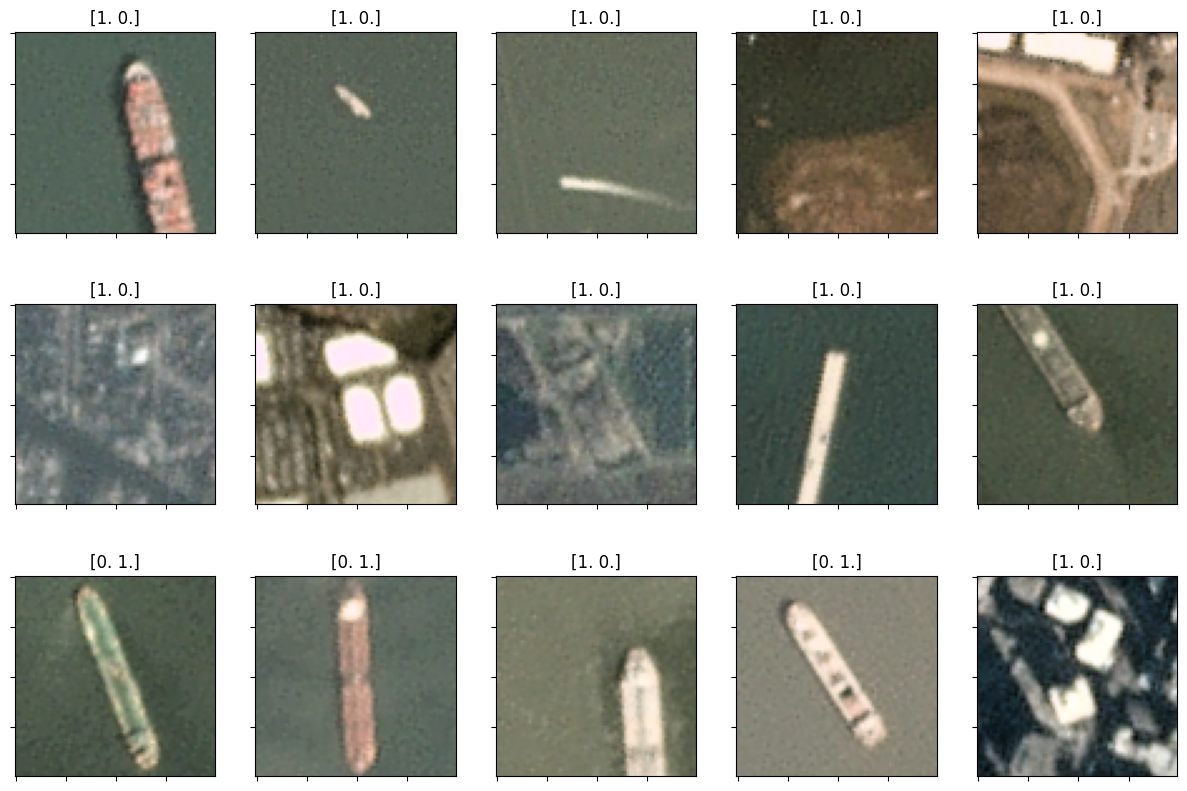

In [5]:
# Plot some sample images
import random

n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(y_train[index])

## Part 2: Build and train the model

In [6]:
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    LeakyReLU,
    MaxPooling2D,
    Input,
)
from keras.models import Sequential

In [7]:
# Define the Neural Network
model = Sequential()
model.add(Input(shape=(80, 80, 3)))

model.add(Conv2D(32, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(negative_slope=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 256)            │             

 Total params: 2,046,850 (7.81 MB)

 Trainable params: 2,045,250 (7.80 MB)

 Non-trainable params: 1,600 (6.25 KB)

In [8]:
# Compile and fit the NN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=1, validation_data=(X_val, y_val))

Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.8086 - loss: 0.4762 - val_accuracy: 0.8955 - val_loss: 0.2575
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.9248 - loss: 0.2201 - val_accuracy: 0.9527 - val_loss: 0.1377
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9448 - loss: 0.1686 - val_accuracy: 0.9726 - val_loss: 0.0843
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.9592 - loss: 0.1274 - val_accuracy: 0.9328 - val_loss: 0.1877
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9663 - loss: 0.1045 - val_accuracy: 0.9515 - val_loss: 0.1276


## Part 3: Evaluate the model

In [9]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9407 - loss: 0.1323
Test Loss: 0.13200144469738007
Test Accuracy: 0.939393937587738


In [10]:
import plotly.graph_objects as go

# Extract data from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(len(accuracy)))

# Create a figure for Training and Validation accuracy
fig_accuracy = go.Figure()

# Add Training accuracy trace
fig_accuracy.add_trace(go.Scatter(x=epochs, y=accuracy, mode='lines', name='Training accuracy', line=dict(color='blue')))

# Add Validation accuracy trace
fig_accuracy.add_trace(go.Scatter(x=epochs, y=val_accuracy, mode='lines', name='Validation accuracy', line=dict(color='red')))

# Set title and labels
fig_accuracy.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Accuracy'
)

# Create a figure for Training and Validation loss
fig_loss = go.Figure()

# Add Training loss trace
fig_loss.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Training loss', line=dict(color='blue')))

# Add Validation loss trace
fig_loss.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Validation loss', line=dict(color='red')))

# Set title and labels
fig_loss.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss'
)

fig_accuracy.show()
fig_loss.show() 

